In [1]:
import os
import pandas as pd

def load_dataset_from_directory(root_path):
    data = []
    labels = []

    for category in os.listdir(root_path):
        category_path = os.path.join(root_path, category)
        if os.path.isdir(category_path):
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                try:
                    with open(file_path, 'r', encoding='latin1') as file:
                        content = file.read()
                        data.append(content)
                        labels.append(category)
                except Exception as e:
                    print(f"Could not read {file_path}: {e}")

    return pd.DataFrame({'text': data, 'label': labels})

root_dir = r'C:\Users\imran\OneDrive\Desktop\Celebal\20_newsgroups\20_newsgroups'  
df = load_dataset_from_directory(root_dir)

# Show basic info
df.head(20)


,text,label
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
5,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
6,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism
7,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
8,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism
9,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism


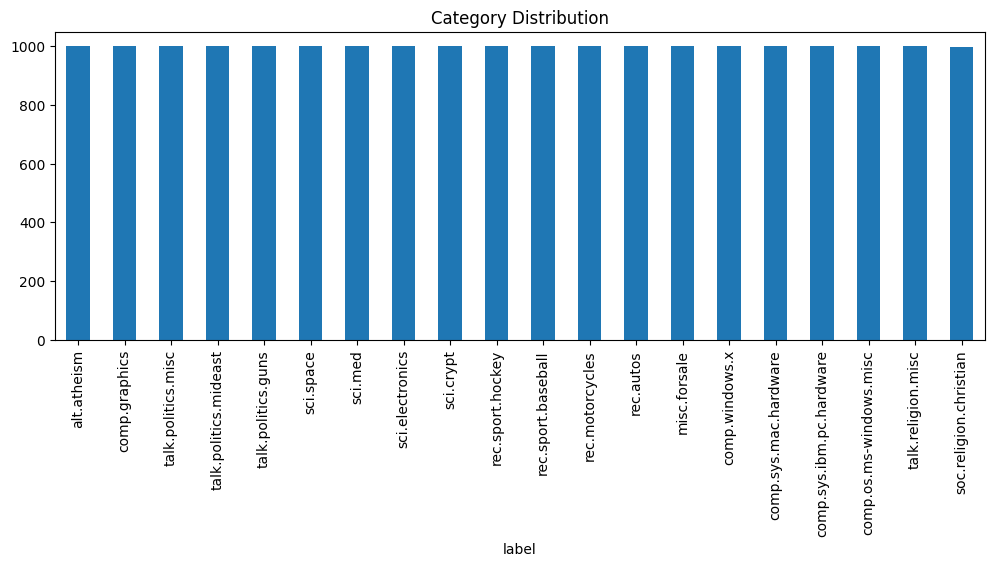

In [2]:
# Drop empty or short texts
df = df[df['text'].str.strip().str.len() > 20]

# Check class distribution
df['label'].value_counts().plot(kind='bar', figsize=(12, 4), title='Category Distribution');


In [6]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # This is the missing resource
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data]

True

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]

    return tokens


In [5]:
df['tokens'] = df['text'].apply(preprocess_text)
df[['label', 'tokens']].head()

,label,tokens
0,alt.atheism,"[xref, cantaloupesrvcscmuedu, altatheism, alta..."
1,alt.atheism,"[xref, cantaloupesrvcscmuedu, altatheism, alta..."
2,alt.atheism,"[newsgroups, altatheism, path, cantaloupesrvcs..."
3,alt.atheism,"[xref, cantaloupesrvcscmuedu, altatheism, altp..."
4,alt.atheism,"[xref, cantaloupesrvcscmuedu, altatheism, socm..."


In [6]:
from gensim import corpora

# Create dictionary from tokens
dictionary = corpora.Dictionary(df['tokens'])

# Filter extremes 
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create corpus (Bag-of-Words)
corpus = [dictionary.doc2bow(text) for text in df['tokens']]


In [7]:
from gensim.models import LdaModel

# Set number of topics
num_topics = 10

# Train LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=10,
                     random_state=42)


In [8]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.108223  0.168239       1        1  22.745168
0      0.005829  0.169852       2        1  19.169629
8      0.071606  0.106144       3        1   9.616700
9     -0.024883 -0.138698       4        1   9.157177
2      0.094819 -0.177585       5        1   8.447554
7      0.081958  0.106399       6        1   8.401227
3      0.169463 -0.206811       7        1   6.664061
1     -0.174211 -0.056945       8        1   6.122958
4      0.001286  0.038224       9        1   6.104136
6     -0.334090 -0.008818      10        1   3.571390, topic_info=                 Term          Freq         Total Category  logprob  loglift
557        university  11059.000000  11059.000000  Default  30.0000  30.0000
922              game   3572.000000   3572.000000  Default  29.0000  29.0000
931        government   4417.000000   4417.000000  Default  28.0000  28.0000
1691  nntppostinghost   9367.000000   9367.000000  Default  27.0000  27.0000
214              file   4043.000000   4043.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
289              john    493.093501   2690.866175  Topic10  -5.3011   1.6353
2444         division    407.289302    993.564235  Topic10  -5.4922   2.4404
1423             year    491.144157   6434.822956  Topic10  -5.3050   0.7595
1483             news    459.204194   5680.334567  Topic10  -5.3723   0.8169
1421            would    448.146506  17449.494470  Topic10  -5.3966  -0.3297

[768 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
18642      8  0.989244   aafreenetcarletonca
16572      3  0.993648          acceleration
2895       1  0.027187                access
2895       2  0.021093                access
2895       3  0.022968                access
...      ...       ...                   ...
4562       2  0.955910             yesterday
4562       3  0.009715             yesterday
4562       8  0.023315             yesterday
7608       6  0.982844  yrusnewswwmantiscouk
24342      3  0.997068               zoology

[2065 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 9, 10, 3, 8, 4, 2, 5, 7])

In [9]:
# Save the trained model
lda_model.save("model2/lda_model_20_topics.gensim")

# Save dictionary
dictionary.save("model2/lda_dictionary.gensim")

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert cleaned tokens to a single string
df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# Vectorize with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=5)
X_tfidf = vectorizer.fit_transform(df['clean_text'])


In [11]:
from sklearn.cluster import KMeans

num_clusters = 10  # Adjust based on your goal
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_tfidf)

In [12]:
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print(f"\n🔹 Cluster {i + 1} Top Keywords:")
    print(", ".join([terms[ind] for ind in order_centroids[i, :10]]))



🔹 Cluster 1 Top Keywords:
game, team, player, recsporthockey, hockey, year, recsportbaseball, baseball, fan, win

🔹 Cluster 2 Top Keywords:
god, christian, socreligionchristian, jesus, say, christianaramisrutgersedu, people, approved, morality, bible

🔹 Cluster 3 Top Keywords:
file, compgraphics, compwindowsx, image, program, graphic, thanks, help, email, code

🔹 Cluster 4 Top Keywords:
university, nntppostinghost, article, know, like, space, dont, news, distribution, scimed

🔹 Cluster 5 Top Keywords:
drive, scsi, ide, disk, controller, hard, floppy, compsysibmpchardware, mac, problem

🔹 Cluster 6 Top Keywords:
sale, bike, recmotorcycles, miscforsale, dod, nntppostinghost, new, offer, university, distribution

🔹 Cluster 7 Top Keywords:
window, file, composmswindowsmisc, font, program, application, manager, run, problem, driver

🔹 Cluster 8 Top Keywords:
people, government, gun, right, key, article, law, israel, fbi, armenian

🔹 Cluster 9 Top Keywords:
card, monitor, video, driver, col

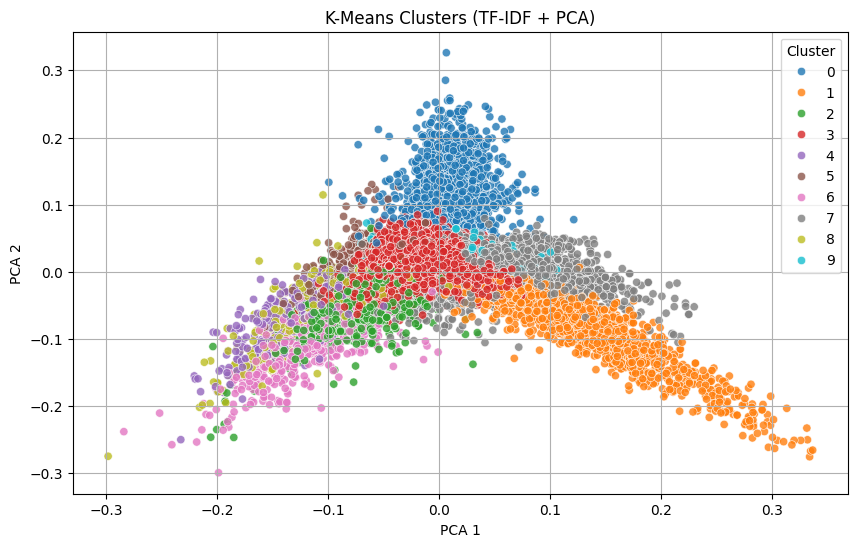

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_tfidf.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0],
                y=reduced_features[:, 1],
                hue=df['kmeans_cluster'],
                palette='tab10',
                alpha=0.8)
plt.title("K-Means Clusters (TF-IDF + PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [16]:
import joblib

# Save KMeans model
joblib.dump(kmeans, "model2/kmeans_model_20_clusters.joblib")

# Save TF-IDF vectorizer
joblib.dump(vectorizer, "model2/tfidf_vectorizer.joblib")


['model2/tfidf_vectorizer.joblib']

In [17]:
new_text = "The graphics card in this PC is amazing!"
new_vector = vectorizer.transform([new_text])
predicted_cluster = kmeans.predict(new_vector)[0]

print(f"Predicted Cluster: {predicted_cluster}")


Predicted Cluster: 8
